In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
from scipy.optimize import fsolve

Physical constants:

In [2]:
EAU = 27.2114
IAU = 3.5e16
LAU = 0.052918
TAU = 2.419e-17
alpha = 1. /137
c = 1/alpha

Field configurations:

In [3]:
#in SI units
wavelength = 800 #e-9 #Wavelength in nm
Int_0 = 4e14 #Intensity in W/cm2
Ip = 0.5 #* 13.5984 # Hydrogen gas target ionization potential in eV

#conversion to atomic units
omega = 2 * np.pi * LAU * c / wavelength  # Angular frequency
TC = 2 * np.pi / omega  # Optical cycle period
E_0 = np.sqrt(Int_0 / IAU)  #field strength
U_pond = (E_0**2) / (4 * omega**2)

print(U_pond)

0.8812603176667388


Defining electric field E(t):

In [4]:
t_list = np.linspace(-TC, TC, 200)  #time list

#mono beam with phase shift φ
def beam_mono(phi):
    e_field = []
    
    for i in t_list:
        mono_beam = E_0 * np.sin(omega * i + phi)
        
        e_field.append(mono_beam)
        
    return e_field

Defining vector potential A(t):

In [5]:
#vector potential A of mono beam:
def vector_potential_mono(phi):
    E_0 = np.sqrt(Int_0 / IAU)  #field strength
    
    vector_pot = []
    
    for i in t_list:
        A_mono = (E_0 / omega) * np.cos(omega * i + phi)
        
        vector_pot.append(A_mono)
        
    return vector_pot

Plot of electric field and vector potential:

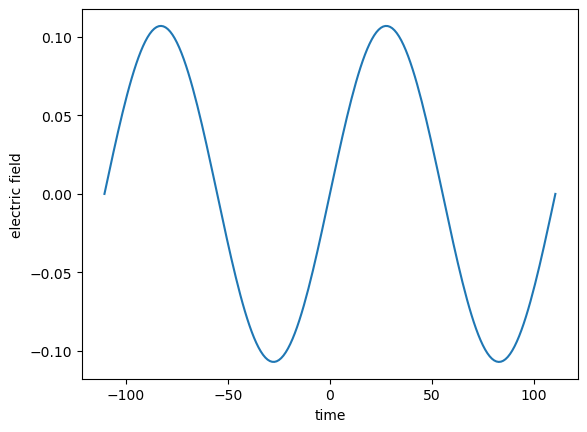

In [6]:
plt.plot(t_list, beam_mono(0), label='electric field')
#plt.plot(t_list, vector_potential_mono(np.pi /2), label='vector potential')

plt.xlabel("time")
plt.ylabel("electric field")
plt.show()

Defining the derivative of the action dS/dt:

In [40]:
#pick value of phase shift (phi):
phi = np.pi/2

def action_drv_mono(t_arr):
    #S_mono = Ip*t + 0.5*p**2*t - (p/omega)*np.cos(omega*t + np.pi/2) + 0.5*t - (1/4*omega)*np.sin(2*omega*t + np.pi)
    t = t_arr[0] + t_arr[1]*1j

    dS_dt_mono_real = np.real(Ip + 0.5* (p + (E_0/omega) * (np.cos(omega*t + phi)) )**2)   #dS/dt = Ip + (p + A(t))^2 
    dS_dt_mono_imag = np.imag(Ip + 0.5* (p + (E_0/omega) * (np.cos(omega*t + phi)) )**2)   #where A(t) = E_0/w * cos(wt + phi)

    return np.array([dS_dt_mono_real, dS_dt_mono_imag])

Finding saddle points:

In [41]:
p = 0  #momentum

ts = []  #empty list to collect saddle points

for m in np.linspace(0, TC, 10):                             #calculate saddle point for every initial guess in timespace
    for n in np.linspace(0, TC/2, 10):
        #print(m+1j*n)
        saddles = fsolve(action_drv_mono, np.array([m,n]), xtol=1e-10)
        saddles = np.round(saddles, 3)
        
        #print(np.linalg.norm(action_drv_mono(saddles)))
        
        if saddles[0] > 0 and saddles[0] < TC:                                   #only keep saddle points with positive real/imag times
            if saddles[1] > 0 and saddles[1] < TC/2:
                if np.linalg.norm(action_drv_mono(saddles)) < 0.1:
                    ts.append(saddles)

saddle_points = [complex(t[0], t[1]) for t in ts]            # Convert (real, imag) pairs to complex numbers

saddle_points = np.unique(np.round(saddle_points, 3))        # Round to 6 d.p., then remove duplicates

print(saddle_points)

[ 4.563+9.246j 50.611+9.246j]


C:\Users\k21071708\AppData\Local\Temp\ipykernel_5584\18505713.py:8: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  saddles = fsolve(action_drv_mono, np.array([m,n]), xtol=1e-10)
C:\Users\k21071708\AppData\Local\Temp\ipykernel_5584\18505713.py:8: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  saddles = fsolve(action_drv_mono, np.array([m,n]), xtol=1e-10)


Sweep momentum p:

C:\Users\k21071708\AppData\Local\Temp\ipykernel_5584\2199130607.py:20: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  saddles = fsolve(action_drv_mono, np.array([m,n]), xtol=1e-8)
C:\Users\k21071708\AppData\Local\Temp\ipykernel_5584\2199130607.py:20: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  saddles = fsolve(action_drv_mono, np.array([m,n]), xtol=1e-8)


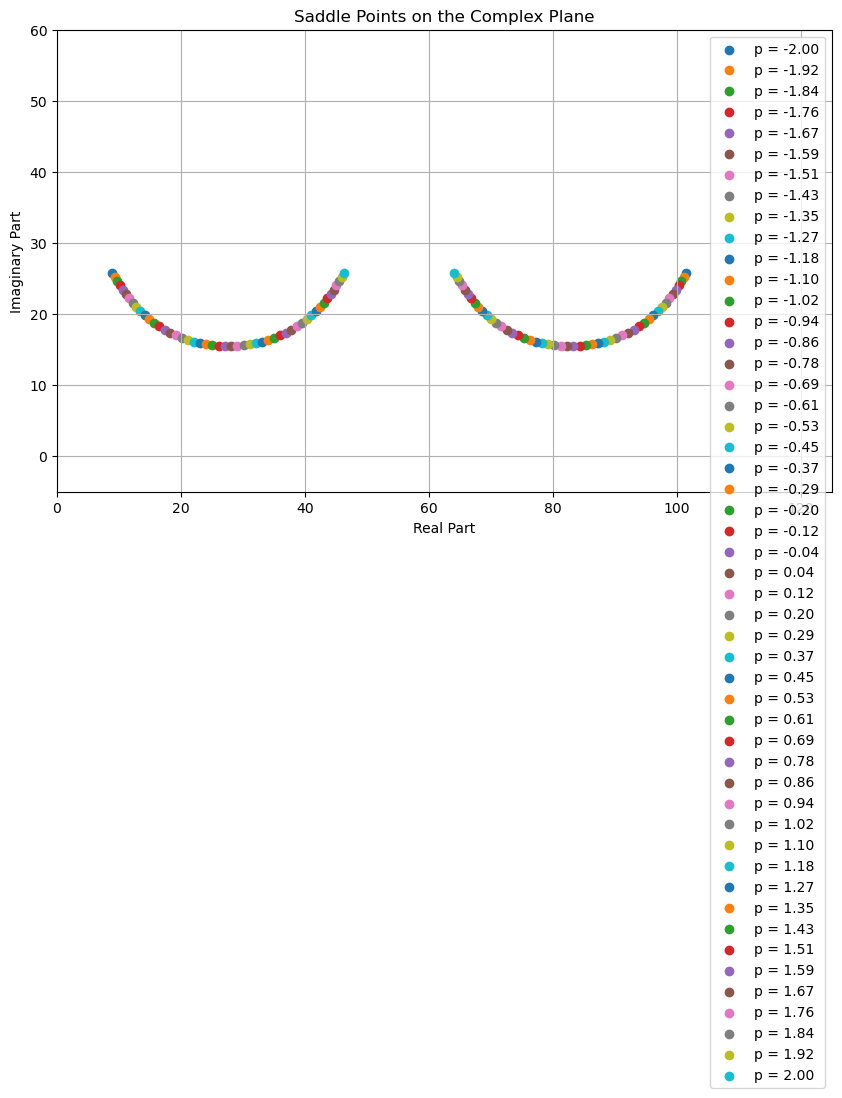

In [42]:
momentum = np.linspace(-2.0, 2.0, 50)

plt.figure(figsize=(10, 6))

for p in momentum:
    
    ts = []
    
    def action_drv_mono(t_arr):
        t = t_arr[0] + t_arr[1]*1j

        dS_dt_mono_real = np.real(Ip + 0.5* (p + (np.sin(omega*t + phi)))**2)
        dS_dt_mono_imag = np.imag(Ip + 0.5* (p + (np.sin(omega*t + phi)))**2)

        return np.array([dS_dt_mono_real, dS_dt_mono_imag])

    for m in np.linspace(0, TC, 10):                             #calculate saddle point for every initial guess in timespace
        for n in np.linspace(0, TC/2, 10):
            #print(m+1j*n)
            saddles = fsolve(action_drv_mono, np.array([m,n]), xtol=1e-8)
            saddles = np.round(saddles, 3)

            if saddles[0] > 0 and saddles[0] < TC:                                   #only keep saddle points with positive real/imag times
                if saddles[1] > 0 and saddles[1] < TC/2:
                    if np.linalg.norm(action_drv_mono(saddles)) < 0.1:
                        ts.append(saddles)

    saddle_points = [complex(t[0], t[1]) for t in ts]            # Convert (real, imag) pairs to complex numbers
    saddle_points = np.unique(np.round(saddle_points, 3))        # Round to 6 d.p., then remove duplicates

    reals = []
    imags = []

    for point in saddle_points:
        real_part = np.real(point)
        reals.append(real_part)

        imag_part = np.imag(point)
        imags.append(imag_part)

    plt.scatter(reals, imags, label=f'p = {p:.2f}')


plt.xlabel('Real Part')
plt.ylabel('Imaginary Part')
plt.xlim(0, 125)  # Set x-axis range (e.g., from 0 to 10)
plt.ylim(-5, 60)  # Set y-axis range (e.g., from 0 to 10)
plt.title('Saddle Points on the Complex Plane')
plt.grid(True)
plt.legend()
plt.show()

Plotting trajectory:

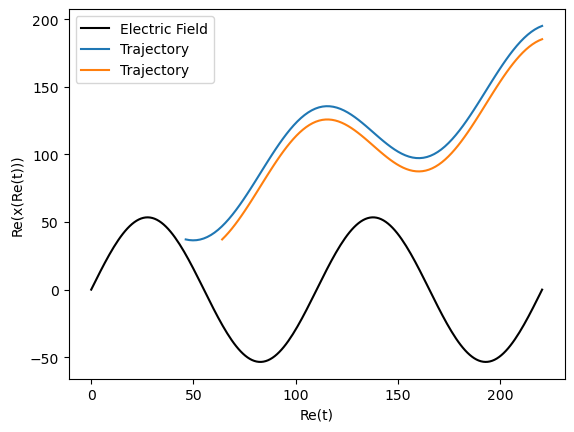

In [43]:
p = 0  #initialise momentum

# Create a figure and axis for plotting
fig, ax = plt.subplots()
ax.set_xlabel("Re(t)")
ax.set_ylabel("Re(x(Re(t)))")

# Plot the electric field
times = np.linspace(0.0, 2 * TC, 200)  # 200 time points
electric_field = [i*500 for i in beam_mono(0)]

ax.plot(times, electric_field, color="black", label="Electric Field")


#Plot the trajectories
for sad in saddle_points:
    real_times = np.linspace(np.real(sad), 2*TC, 100)

    positions = []
    
    for t in real_times:
        integrated_A_t = (E_0/omega**2) * np.sin(omega*t + phi)
        integrated_A_ts = (E_0/omega**2) * np.sin(omega*sad + phi)
        integrated_A = integrated_A_t - integrated_A_ts

        final_x = p*(t - sad) + integrated_A
    
        positions.append(final_x)


    ax.plot(real_times, np.real(positions), linestyle="solid", label="Trajectory")

plt.legend()
plt.show()